# Transfer Learning

This notebook imports the MobileNet classification network for images classification.
- It removes the last layer and replaces it by several dense layers with a 3 dimensional output for 3 classes prediction
- It downloads a set of images from a github directory with 3 classes (cats, dogs and horses)
- The model is trained with this new data set

---
# TODO

Running this script, a model will be trained and can then be used to predict which class a new unseen image belongs to, by using model.predict(new_image).

---
1. Run the script, using images from the github 
!git clone https://github.com/albenoit/transfer-learning/
It contains three folders each having different number of images from the three classes. Use either the traindata or traindata_2 folders

2. Get images from the val folder, preprocess them using the same preprocess_image function, and use model.predict(image) to predict their labels. The default prediction is a vector of probabilities, np.argmax can be used to get the predicted label from the probabilities.

3. Plot a set of 4 images from the validation sample, and print their predicted label.
4. Do the same with images that you generate directly using random generator  (Use for that np.random.uniform(size=[32, 224, 224, 3]))
5. Get the layer preceding the output from the network, Generate some images, and get their feature map at that layer. Use for that
model2=Model(inputs=base_model.input,outputs=base_model.layers[-2].output) using your new model in place of the base_model

In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
# specify the inputs and the outputs
# now a model has been created based on our architecture
# Check the architecture of the model
for i,layer in enumerate(model.layers):
  print(i,layer.name,layer.input_shape)

0 input_2 [(None, None, None, 3)]
1 conv1 (None, None, None, 3)
2 conv1_bn (None, None, None, 32)
3 conv1_relu (None, None, None, 32)
4 conv_dw_1 (None, None, None, 32)
5 conv_dw_1_bn (None, None, None, 32)
6 conv_dw_1_relu (None, None, None, 32)
7 conv_pw_1 (None, None, None, 32)
8 conv_pw_1_bn (None, None, None, 64)
9 conv_pw_1_relu (None, None, None, 64)
10 conv_pad_2 (None, None, None, 64)
11 conv_dw_2 (None, None, None, 64)
12 conv_dw_2_bn (None, None, None, 64)
13 conv_dw_2_relu (None, None, None, 64)
14 conv_pw_2 (None, None, None, 64)
15 conv_pw_2_bn (None, None, None, 128)
16 conv_pw_2_relu (None, None, None, 128)
17 conv_dw_3 (None, None, None, 128)
18 conv_dw_3_bn (None, None, None, 128)
19 conv_dw_3_relu (None, None, None, 128)
20 conv_pw_3 (None, None, None, 128)
21 conv_pw_3_bn (None, None, None, 128)
22 conv_pw_3_relu (None, None, None, 128)
23 conv_pad_4 (None, None, None, 128)
24 conv_dw_4 (None, None, None, 128)
25 conv_dw_4_bn (None, None, None, 128)
26 conv_dw_4_rel

Now that we have our model, as we will be using the pre-trained weights, that our model has been trained on (imagenet dataset), we have to set all the weights to be non-trainable. We will only be training the last Dense layers that we have made previously. The code for doing this is given below.

In [ ]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:87]:
    layer.trainable=False
for layer in model.layers[87:]:
    layer.trainable=True

ImageDataGenerators are built in keras and help us to train our model. We just have to specify the path to our training data and it automatically sends the data for training, in batches. It makes the code much simpler.

For that we need our training data in a particular format as mentioned earlier, and we can download such data from the following github.

In [ ]:
!git clone https://github.com/aditya9898/transfer-learning/

Cloning into 'transfer-learning'...
remote: Enumerating objects: 211, done.
remote: Total 211 (delta 0), reused 0 (delta 0), pack-reused 211
Receiving objects: 100% (211/211), 1.37 MiB | 7.95 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
# Give the path to the main dataset folder
# for example you can find the data in the link
# https://github.com/aditya9898/transfer-learning/tree/master/train
# for that clone the github directory
# #!git clone https://github.com/aditya9898/transfer-learning/
train_generator=train_datagen.flow_from_directory('./transfer-learning/train/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 197 images belonging to 3 classes.


For this we first compile the model that we made, and then train our model with our generator. This can be done using the code below.



In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
6/6 [==============================] - 11s 141ms/step - loss: 2.3343 - accuracy: 0.4485
Epoch 2/10
6/6 [==============================] - 1s 83ms/step - loss: 0.4387 - accuracy: 0.8606
Epoch 3/10
6/6 [==============================] - 1s 83ms/step - loss: 0.1533 - accuracy: 0.9455
Epoch 4/10
6/6 [==============================] - 1s 90ms/step - loss: 0.0767 - accuracy: 0.9740
Epoch 5/10
6/6 [==============================] - 1s 83ms/step - loss: 0.0683 - accuracy: 0.9697
Epoch 6/10
6/6 [==============================] - 1s 83ms/step - loss: 0.0372 - accuracy: 0.9818
Epoch 7/10
6/6 [==============================] - 1s 91ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 1s 98ms/step - loss: 0.0100 - accuracy: 0.9939
Epoch 9/10
6/6 [==============================] - 1s 88ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 1s 76ms/step - loss: 0.0016 - accuracy: 1.0000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 3)


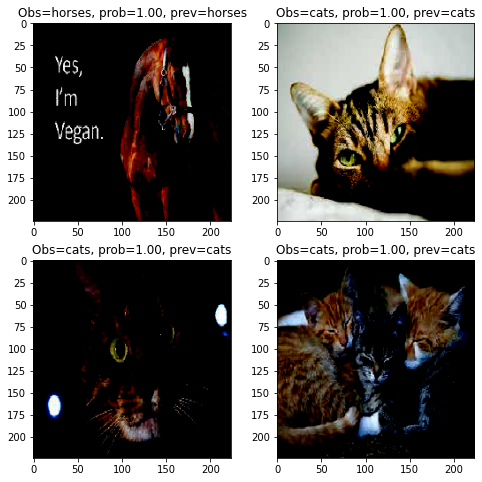

In [ ]:
# Get validation images and compute their predictions
# plot images together with the predicted class in the title as well as its posterior probability

x , y = train_generator.next()
#x , y = test_generator.next()
categories =sorted(os.listdir('transfer-learning/train/'))
prev = model.predict(x)
print(prev.shape)

# plot three images and print their class
import  matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
for j in range(4):
  plt.subplot(2,2,j+1)
  plt.imshow(x[j])
  plt.title('Obs={id}, prob={p:.2f}, prev={pred}'.format(id=categories[np.argmax(y[j])], pred=categories[np.argmax(prev[j])],p=np.max(prev[j])))